<a id=section1></a> 
## 1. Problem Statement 

    Trend of 1,000 most popular movies on IMDB between 2006 to 2016.

<a id=section101></a> 
### 1.1. Introduction
This Exploratory Data Analysis is to submit the Term 1 project in our classroom. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis. 

<a id=section102></a> 
### 1.2. Data source and dataset

__a__. How was it collected? 

     I don't have the actual source from where the data was collected. 
- __Description__: "With 1000 rows, the data is collected till Year 2016. Today in FEB 2020, the market conditions of movies might be different.

__b__. Is it a sample? If yes, was it properly sampled?
- Yes, it is a sample. I don't have official information about the data collection method, but it appears *not* to be a random sample, so we can assume that it is not representative. 

<a id=section2></a> 
### 2. Load the packages and data 

In [182]:
#import packages
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from os import path
from scipy.misc import imread
import random
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline
sns.set()

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

#loading dataset
moviesDataDF = pd.read_csv("moviesdata.csv",encoding='utf-8')



<a id=section3></a> 
### 3. Data Profiling



Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

<a id=section301></a> 
### 3.1 Understanding the Dataset



To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [159]:
moviesDataDF.dtypes                                                                       # Display the data type for each variable

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

In [160]:
moviesDataDF.head()   

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [161]:
#Generates descriptive statistics that summarize the central tendency,
#dispersion and shape of a dataset’s distribution, excluding NaN values.
#Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. 

moviesDataDF.describe(include = 'all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",The son of a virtual world designer goes looki...,Ridley Scott,"Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese ...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


#### Observations

As we can observe that 
1. The Revenue and Metascore column count is less than other columns
we will check this column to check whether it has any NULL values. 
We have done this in __section 3.3.1__.

2. The Min value of Year is 2006 and Max value is 2016.
which suggest that this data is between year 2006 and 2016

3. We can also see there are 207 Genre but we will be concentrating on most used.

4. We can see Genre column has values which are combination of different genre.




In [163]:
moviesDataDF.sample(5)        # Display a random 5 rows from the data set

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
297,298,The Devil Wears Prada,"Comedy,Drama",A smart but sensible new graduate lands a job ...,David Frankel,"Anne Hathaway, Meryl Streep, Adrian Grenier, E...",2006,109,6.8,302268,124.73,62.0
116,117,The Neon Demon,"Horror,Thriller",When aspiring model Jesse moves to Los Angeles...,Nicolas Winding Refn,"Elle Fanning, Christina Hendricks, Keanu Reeve...",2016,118,6.2,50359,1.33,51.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0
807,808,The Spectacular Now,"Comedy,Drama,Romance",A hard-partying high school senior's philosoph...,James Ponsoldt,"Miles Teller, Shailene Woodley, Kyle Chandler,...",2013,95,7.1,115751,6.85,82.0
154,155,Twin Peaks: The Missing Pieces,"Drama,Horror,Mystery",Twin Peaks before Twin Peaks (1990) and at the...,David Lynch,"Chris Isaak, Kiefer Sutherland, C.H. Evans, Sa...",2014,91,8.1,1973,NaN,NaN


<a id=section302></a> 
### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [164]:
profile = pandas_profiling.ProfileReport(moviesDataDF)
profile.to_file(outputfile='movies_data_pre_Profiling.html')

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as Now we will process our data to better understand it. __movies_data_pre_Profiling.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

<a id=section303></a> 
### 3.3 Preprocessing


Dealing with our observations


<a id=section30301></a> 
### 3.3.1 Checking the null Columns

In [165]:
#1. The engV and Drive column count is less than other columns
#we will check this column to check whether it has any NULL values. 
moviesDataDF.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

#### Observations

We were Right in our Observation, Revenue and Metascore has 128 and 64 values respectively as null.




<a id=section30302></a> 
### 3.3.1 Replacing Revenue and Metascore with mean. 

In [166]:
moviesDataDF=moviesDataDF.fillna(moviesDataDF.mean())

In [167]:
moviesDataDF.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

#### Observations

As you can see now no data is null.


<a id=section304></a> 
## 3.4 Post Profiling

In [168]:
profile = pandas_profiling.ProfileReport(moviesDataDF)
profile.to_file(outputfile='movies_data_post_Profiling.html')

#### Observations

1. There is one title which was repeated. Name is The HOST





<a id=section401></a> 
## 4.1 Which Director made most movies 

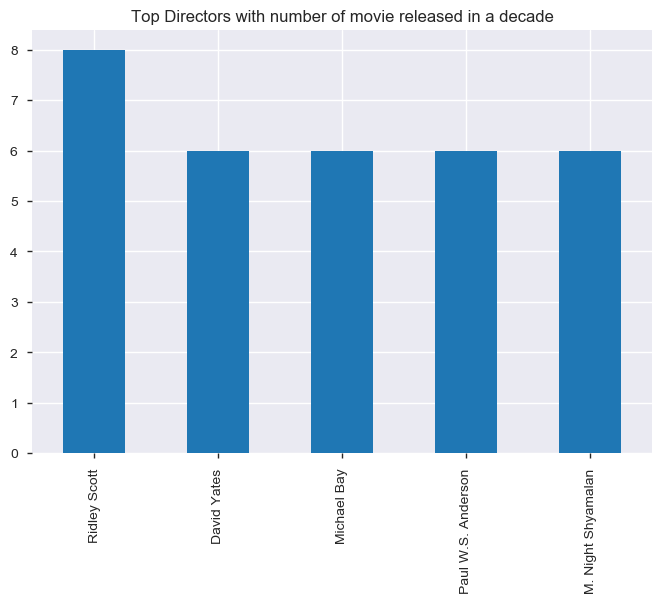

In [169]:
moviesDataDF['Director'].value_counts().head().plot(kind='bar',legend=None,title="Top Directors with number of movie released in a decade")


#### Observations

    1. Ridley Scott directed most movies total 8. 





In [170]:
moviesDataDF['Genre'].unique()


array([u'Action,Adventure,Sci-Fi', u'Adventure,Mystery,Sci-Fi',
       u'Horror,Thriller', u'Animation,Comedy,Family',
       u'Action,Adventure,Fantasy', u'Comedy,Drama,Music', u'Comedy',
       u'Action,Adventure,Biography', u'Adventure,Drama,Romance',
       u'Adventure,Family,Fantasy', u'Biography,Drama,History',
       u'Animation,Adventure,Comedy', u'Action,Comedy,Drama',
       u'Action,Thriller', u'Biography,Drama', u'Drama,Mystery,Sci-Fi',
       u'Adventure,Drama,Thriller', u'Drama', u'Crime,Drama,Horror',
       u'Action,Adventure,Drama', u'Drama,Thriller',
       u'Action,Adventure,Comedy', u'Action,Horror,Sci-Fi',
       u'Adventure,Drama,Sci-Fi', u'Action,Adventure,Western',
       u'Comedy,Drama', u'Horror', u'Adventure,Drama,Fantasy',
       u'Action,Crime,Thriller', u'Action,Crime,Drama',
       u'Adventure,Drama,History', u'Crime,Horror,Thriller',
       u'Drama,Romance', u'Comedy,Drama,Romance',
       u'Horror,Mystery,Thriller', u'Crime,Drama,Mystery',
       u'Dram

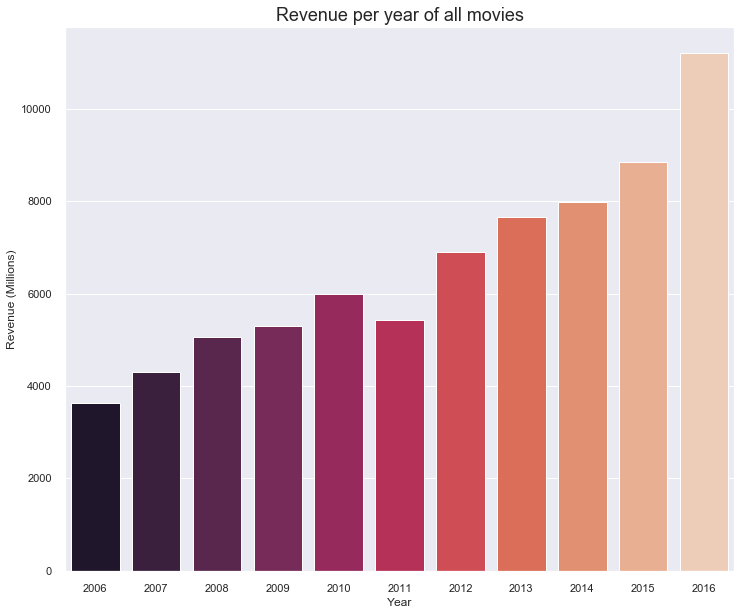

In [186]:
#Revenue of all the movies per year
df = moviesDataDF.groupby('Year')['Revenue (Millions)'].sum().to_frame().reset_index().sort_values(by='Revenue (Millions)')

plt.figure(figsize=(12,10))
sns.barplot(df['Year'], df['Revenue (Millions)'], palette='rocket')
plt.title("Revenue per year of all movies", fontsize=18)
plt.xlabel("Year")
plt.ylabel("Revenue (Millions)")
plt.show()

#### Observations

2016 saw sudden rise in revenue compare to year 2015.
overall there was steady revenue increased between 2007 and 2014.



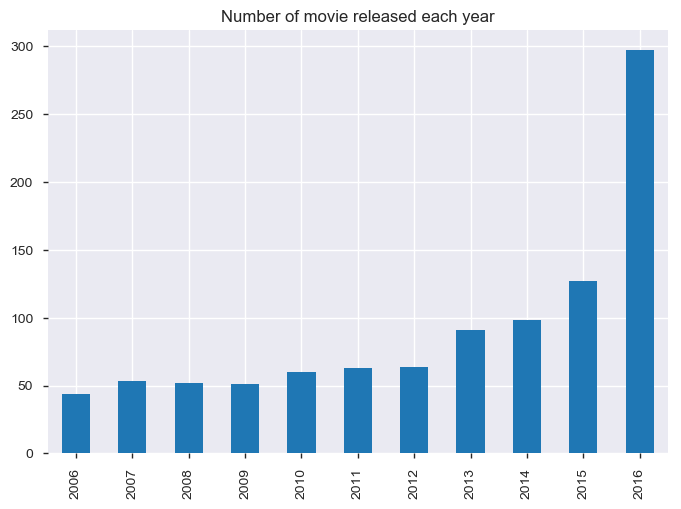

In [172]:
moviesDataDF['Year'].value_counts().sort_index().plot(kind='bar',legend=None,title="Number of movie released each year")


#### Observations

2016 saw almost more than twice number of movies released compare to year 2015.
overall there was steady number of movies released between 2007 and 2014 like within 50 to 100 range. 



Text(0.5,1,'Regplot showing the relation between Rating and Revenue')

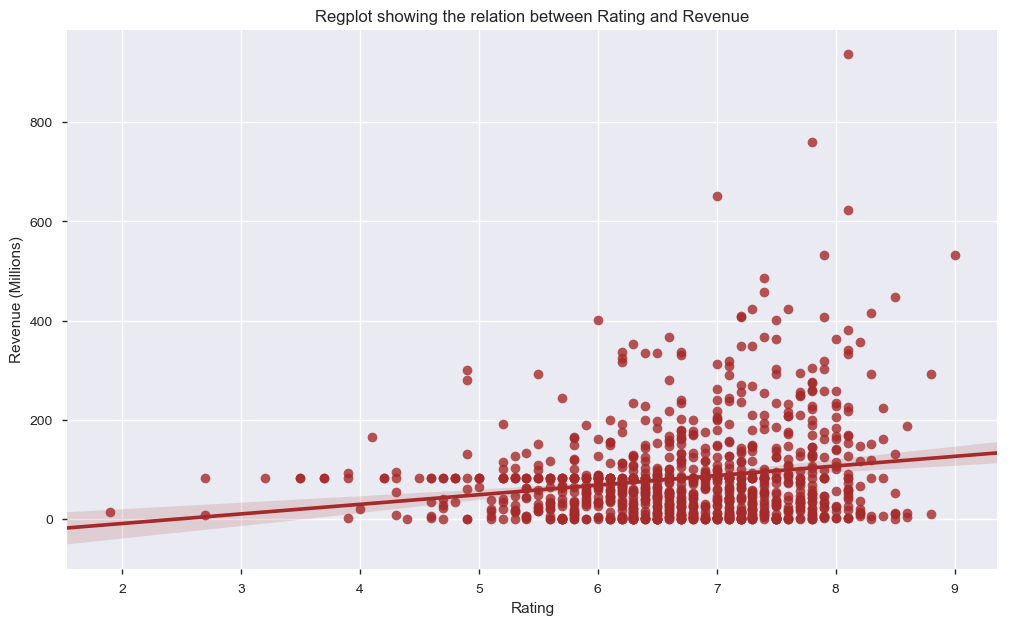

In [173]:
plt.figure(figsize=(12,7))
sns.regplot(data=moviesDataDF, x='Rating', y='Revenue (Millions)', color='brown')

plt.title('Regplot showing the relation between Rating and Revenue')

#### Observations
- As we can see, Rating doesn't matter much when it comes to revenue generation. As we can see rating between 6 to 8 more or less have same revenue.
- Revenue is less when the ratings are below 5.
- We observe, having a rating of 9 didn't earn much revenue

Text(0.5,1,'Regplot showing the relation between Metascore and Votes')

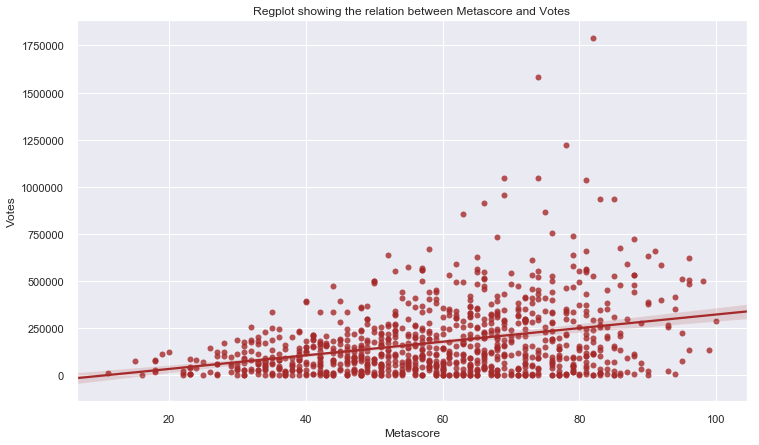

In [184]:
plt.figure(figsize=(12,7))
sns.regplot(data=moviesDataDF, x='Metascore', y='Votes', color='brown')

plt.title('Regplot showing the relation between Metascore and Votes')

#### Observations
As we can see, Metascore and votes are linearly corelated. 

Text(0.5,1,'Hexplot showing the relation between Rank and Revenue (Millions)')

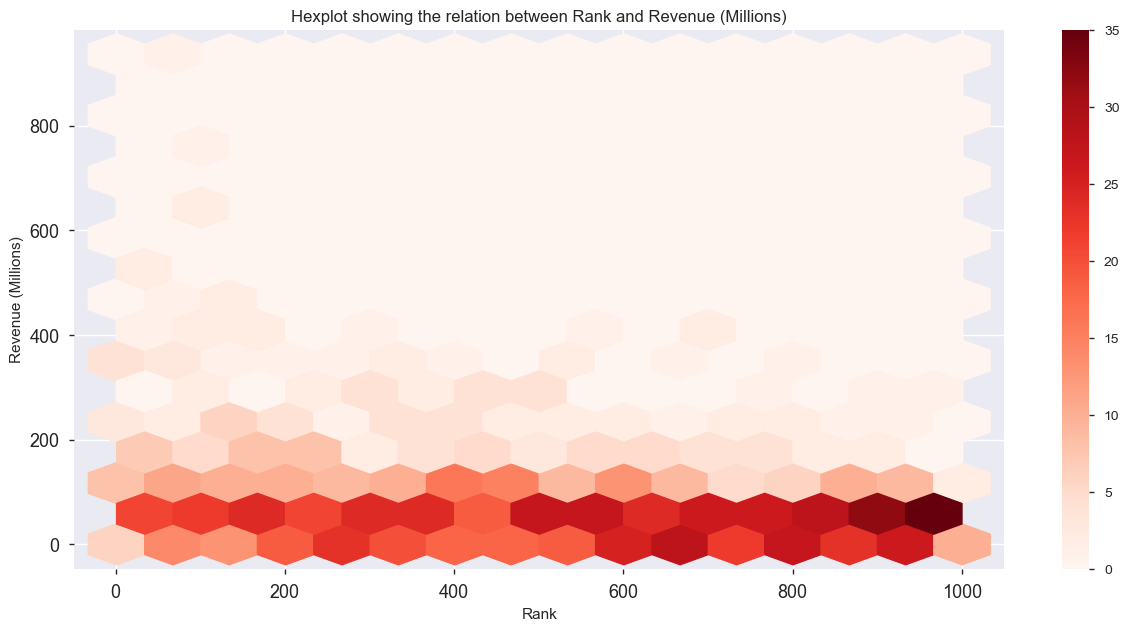

In [175]:
# Using the kind='hexbin' to plot a hexplot.

moviesDataDF.plot(kind='hexbin', x='Rank', y='Revenue (Millions)', figsize=(15, 7), gridsize=15, fontsize=13, colormap='Reds')

plt.title('Hexplot showing the relation between Rank and Revenue (Millions)')

#### Observations
- As we can see, Rank and revenue are not highly correlated when it comes to revenue generation increased.
- When the revenue is very less and rank is last it is corelated.

In [ ]:

#Revenue of all the movies per year
df = moviesDataDF.groupby('Year')['Votes'].sum().to_frame().reset_index().sort_values(by='Votes')

plt.figure(figsize=(12,10))
sns.barplot(df['Year'], df['Votes'], palette='rocket')
plt.title("Votes per year of all movies", fontsize=18)
plt.xlabel("Year movie was released")
plt.ylabel("Votes")
plt.show()

#### Observations
Here, bit surprise to see that number votes cast in 2016 is less even though the number of released is more.

In [176]:
#Since Genre is combination of more than on genre, i have tried to segregate it
uniqueGenreMoviesDataDF = moviesDataDF['Genre'].unique()
individual_genres = []
for genre in uniqueGenreMoviesDataDF:
    individual_genres.append(genre.split(','))

individual_genres = list(itertools.chain.from_iterable(individual_genres))
individual_genres = set(individual_genres)

individual_genres

{u'Action',
 u'Adventure',
 u'Animation',
 u'Biography',
 u'Comedy',
 u'Crime',
 u'Drama',
 u'Family',
 u'Fantasy',
 u'History',
 u'Horror',
 u'Music',
 u'Musical',
 u'Mystery',
 u'Romance',
 u'Sci-Fi',
 u'Sport',
 u'Thriller',
 u'War',
 u'Western'}

Number of movies in each genre: 

(u'Mystery', 106)
(u'Romance', 141)
(u'History', 29)
(u'Sport', 18)
(u'Sci-Fi', 120)
(u'Family', 51)
(u'Horror', 119)
(u'Musical', 5)
(u'Crime', 150)
(u'Drama', 513)
(u'Fantasy', 101)
(u'War', 13)
(u'Animation', 49)
(u'Music', 21)
(u'Adventure', 259)
(u'Action', 303)
(u'Comedy', 279)
(u'Western', 7)
(u'Thriller', 195)
(u'Biography', 81)


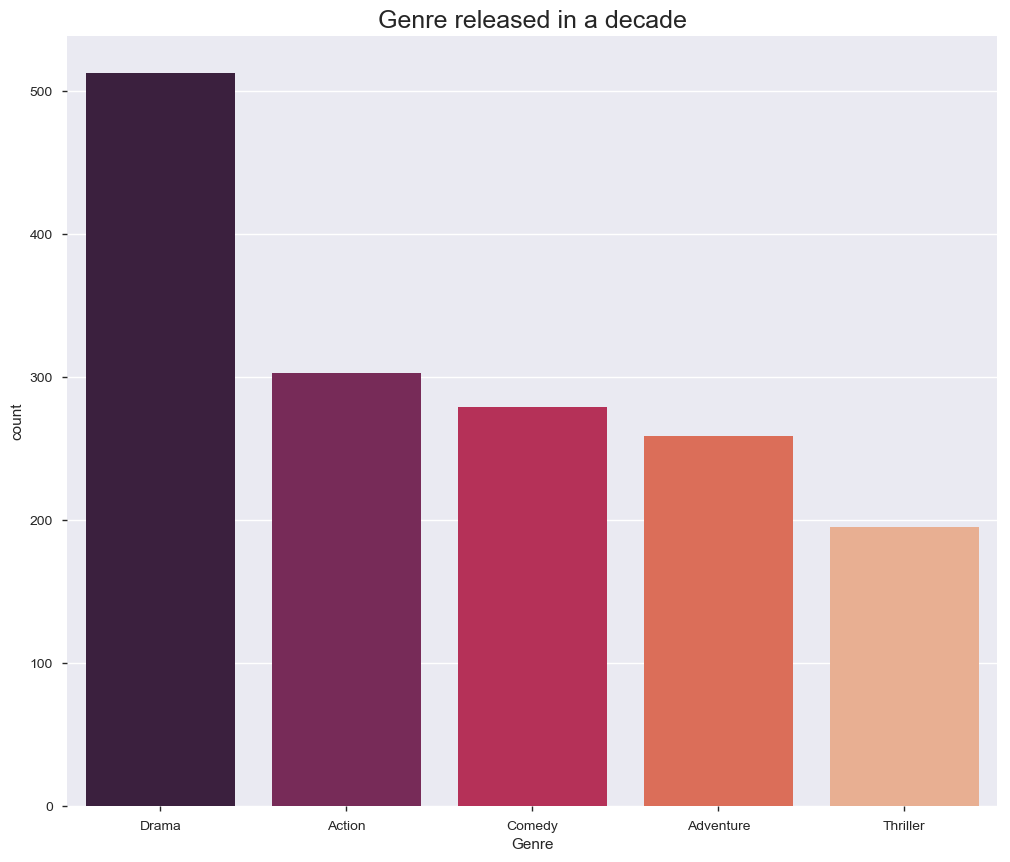

In [177]:
print('Number of movies in each genre: \n')
moviesDataDFNew = []
for genre in individual_genres:
    current_genre = moviesDataDF['Genre'].str.contains(genre).fillna(False)
    print(genre, len(moviesDataDF[current_genre]))
    moviesDataDFNew += [[genre,len(moviesDataDF[current_genre])]]



onlyGenre_df = pd.DataFrame(moviesDataDFNew,columns=['Genre','count'])
onlyGenre_df = onlyGenre_df.sort_values('count',ascending = False ).head()


plt.figure(figsize=(12,10))
sns.barplot(onlyGenre_df['Genre'], onlyGenre_df['count'], palette='rocket')
plt.title("Genre released in a decade", fontsize=18)
plt.xlabel("Genre")
plt.ylabel("count")
plt.show()

#### Observations
We have seen Drama and Action Genre were released more followed by comedy.

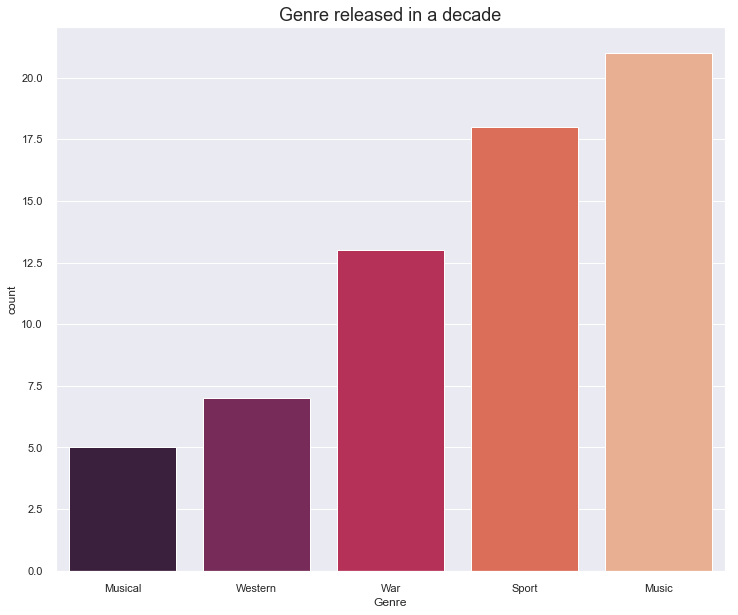

In [185]:
onlyGenre_df = pd.DataFrame(moviesDataDFNew,columns=['Genre','count'])
onlyGenre_df = onlyGenre_df.sort_values('count',ascending = True ).head()
plt.figure(figsize=(12,10))
sns.barplot(onlyGenre_df['Genre'], onlyGenre_df['count'], palette='rocket')
plt.title("Genre released in a decade", fontsize=18)
plt.xlabel("Genre")
plt.ylabel("count")
plt.show()

#### Observations
We have seen western and War Genre were released less. 

In [ ]:
moviesDataDFTitle = moviesDataDF.set_index('Title')
 
moviesDataDF.loc[moviesDataDF['Title'] == 'The Host']


#### Observation

Even though it had same Title, the Genre, Description, Actors were different. 

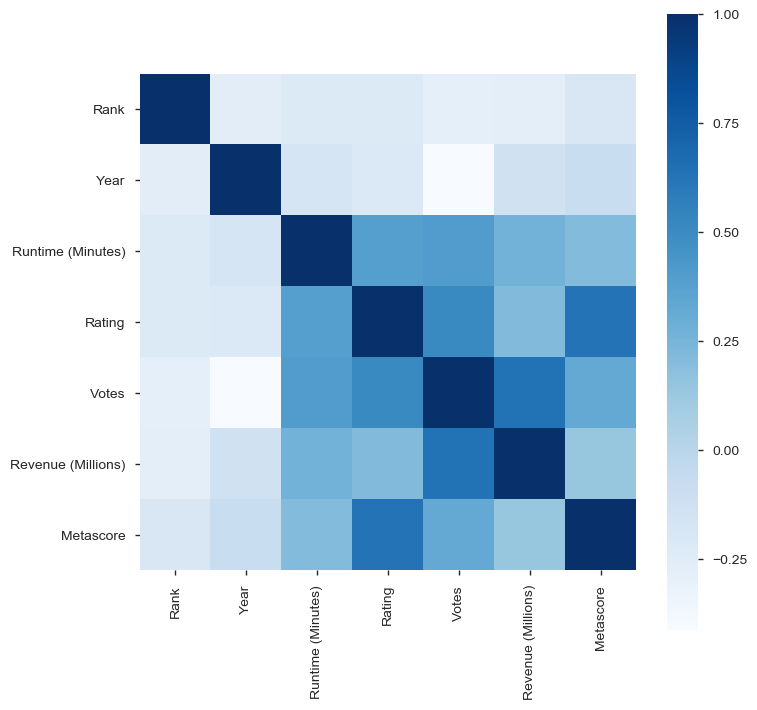

In [157]:
features_correlation = moviesDataDF.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

#### Observations
- Revenue and Votes are highly corelated
- Rating and Metascore are highly corelated
- Rating and votes are somewhat corelated
- Rank and Year has no effect whatsoever on Revenue generation, nor votes, nor metascore

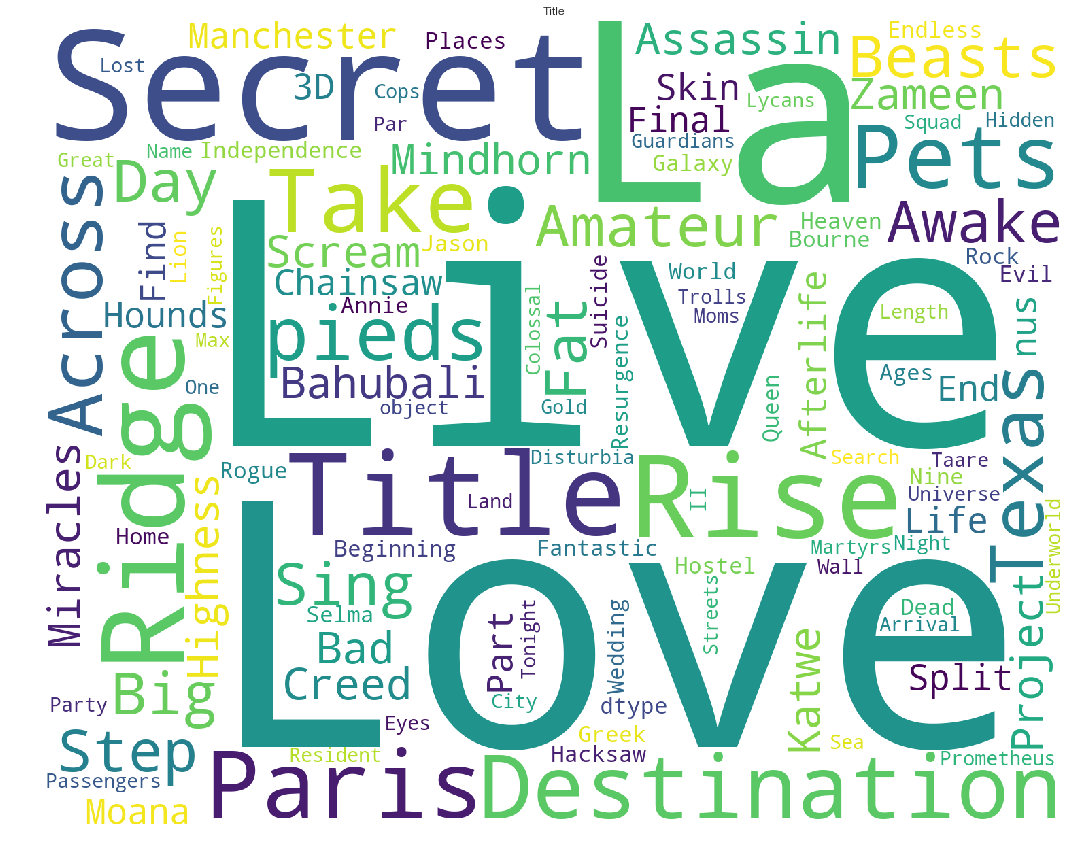

In [183]:
text = (str(moviesDataDF['Title']))
plt.subplots(figsize=(20,15))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1500,
                          height=1200
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('Title')
plt.axis('off')
plt.show()

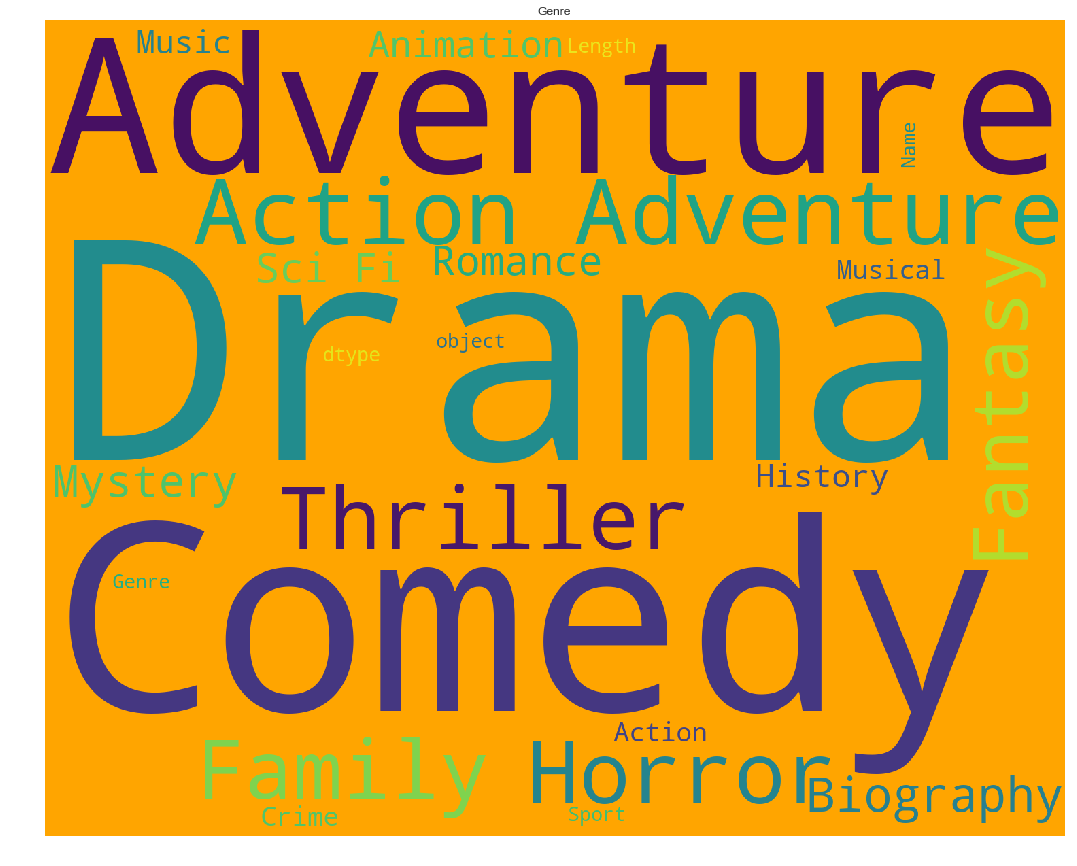

In [191]:
text = (str(moviesDataDF['Genre']))
plt.subplots(figsize=(20,15))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='Orange',
                          width=1500,
                          height=1200
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('Genre')
plt.axis('off')
plt.show()

### Conclusion

- The Data set was pretty clean.
- Ridley Scott directed most movies total 8.
- 2016 saw almost more than twice number of movies released compare to year 2015.
- overall there was steady number of movies released between 2007 and 2014 like within 50 to 100 range. 
- As we can see, Rating doesn't matter much when it comes to revenue generation. As we can see rating between 6 to 8 more or less have same revenue.
- Revenue is less when the ratings are below 5.
- We observe, having a rating of 9 didn't earn much revenue
- We have seen Drama and Action Genre were released more followed by comedy.
- Revenue and Votes are highly corelated.
- Rating and Metascore are highly corelated.
- Rating and votes are somewhat corelated.
- Rank and Year has no effect whatsoever on Revenue generation, nor votes, nor metascore.